In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
from medvqa.train_phrase_grounding import debug_main

2025-05-07 09:46:24,436 - root - INFO - Logging configured (Color: True).


In [3]:
out = debug_main("""
--epochs 200 \
--batches_per_epoch 50 \
--max_images_per_batch 11 \
--max_phrases_per_batch 1000 \
--max_phrases_per_image 40 \
--val_batch_size_factor 2.0 \
--raw_image_encoding "cxrmate-rrg24-uniformer-huggingface" \
--huggingface_model_name "aehrc/cxrmate-rrg24" \
--image_size 384 384 \
--image_local_feat_size 512 \
--num_regions 144 \
--regions_width 12 \
--regions_height 12 \
--img_aug_mode "random-color-and-spatial" \
--phrase_embedding_size 128 \
--phrase_grounding_mode "adaptive_film_based_pooling_mlp_with_bbox_regression" \
--phrase_mlp_hidden_dims 256 128 \
--visual_grounding_hidden_size 256 \
--bbox_format "cxcywh" \
--predict_relative_bbox_coords \
--num_train_workers 3 \
--num_val_workers 2 \
--gradient_accumulation_steps 4 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,8e-5,5,3e-6,8e-5,5,3e-6" \
--binary_multilabel_classif_loss_name "focal+bce+npbbce" \
--do_visual_grounding_with_bbox_regression \
--use_mscxr_for_train \
--use_mscxr_for_val \
--mscxr_training_data_mode "train" \
--mscxr_do_grounding_only \
--mscxr_phrase2embedding_filepath \
"/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding(hash=36549,2076639799495206637).pkl" \
--use_padchest_gr_for_train \
--padchest_gr_phrase_embeddings_filepath \
"/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/padchest/padchest_gr_phrase2embedding(hash=197646,3110652540680293604).pkl" \
--padchest_gr_training_split "all" \
--padchest_gr_weight 1.0 \
--mscxr_weight 1.0 \
--no_save
""")

2025-05-07 09:46:25,902 - medvqa.utils.common - INFO - 
script's arguments:
   epochs: 200
   batches_per_epoch: 50
   max_images_per_batch: 11
   max_phrases_per_batch: 1000
   max_phrases_per_image: 40
   val_batch_size_factor: 2.0
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: None
   freeze_image_encoder: False
   raw_image_encoding: cxrmate-rrg24-uniformer-huggingface
   huggingface_model_name: aehrc/cxrmate-rrg24
   num_regions: 144
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   image_encoder_dropout_p: 0
   yolov8_model_name_or_path: None
   yolov8_model_alias: None
   phrase_embedding_size: 128
   regions_width: 12
   regions_height: 12
   qkv_size: None
   phrase_grounding_mode: adaptive_film_based_pooling_mlp_with_bbox_regression
   phrase_classifier_hidden_size: None
   transf_d_model: None
   transf_nhead: None
   transf_dim_feedforward: None
   transf_dropout: 0
   transf_num_lay

2025-05-07 09:46:31,853 - medvqa.losses - INFO - Focal_BCE_NPBBCE_Loss(): focal_weight = 0.3333333333333333, bce_weight = 0.3333333333333333, npbbce_weight = 0.3333333333333333
2025-05-07 09:46:31,854 - medvqa.losses - INFO - Focal_BCE_WBCBCE_Loss(): focal_weight = 0.3333333333333333, bce_weight = 0.3333333333333333, wbcbce_weight = 0.3333333333333333
2025-05-07 09:46:31,855 - medvqa.training.phrase_grounding - INFO - foreground_loss_weight: 1.0
2025-05-07 09:46:31,856 - medvqa.training.phrase_grounding - INFO - background_loss_weight: 1.0
2025-05-07 09:46:31,857 - medvqa.losses.optimizers - INFO - GradientAccumulator.__init__(): num_accumulation_steps = 4, max_grad_norm = None
2025-05-07 09:46:31,859 - medvqa.losses - INFO - Focal_BCE_NPBBCE_Loss(): focal_weight = 0.3333333333333333, bce_weight = 0.3333333333333333, npbbce_weight = 0.3333333333333333
2025-05-07 09:46:31,860 - medvqa.losses - INFO - Focal_BCE_NPBBCE_Loss(): focal_weight = 0.3333333333333333, bce_weight = 0.333333333333

In [4]:
from importlib import reload
import medvqa

In [20]:
reload(medvqa.datasets.data_inspection_utils)

<module 'medvqa.datasets.data_inspection_utils' from '/home/pamessina/medvqa/medvqa/datasets/data_inspection_utils.py'>

In [21]:
from medvqa.datasets.data_inspection_utils import inspect_mscxr_dataset, inspect_padchest_phrase_grounding_dataset

idx: 27
dicom_id: 29929685-ae7731db-33f9f7e2-2eed3f1e-51aa9261
image_path: /mnt/workspace/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10884708/s55751585/29929685-ae7731db-33f9f7e2-2eed3f1e-51aa9261.jpg
report:
                                 FINAL REPORT
 EXAMINATION:  CHEST (PORTABLE AP)
 
 INDICATION:  ___ year old woman with metastatic breast cancer and likely
 malignant R pleural effusion s/p R pleurex catheter placement on ___, now
 with small R apical pneumothorax.  // assess interval change in R apical
 pneumothorax    assess interval change in R apical pneumothorax
 
 IMPRESSION: 
 
 Comparison to ___.  Decrease in extent of the right pneumothorax that
 nonetheless remains clearly visible.  Mild decrease in lung volumes.  Stable
 extent of the known extensive right pleural effusion.  Known masses in the
 left lung.

metadata:
{'report_index': 1980, 'part_id': 10, 'subject_id': 10884708, 'study_id': 55751585, 'dicom_id': '29929685-ae7731db-33f9f7e2-2eed3f1e-51aa9261', 'v

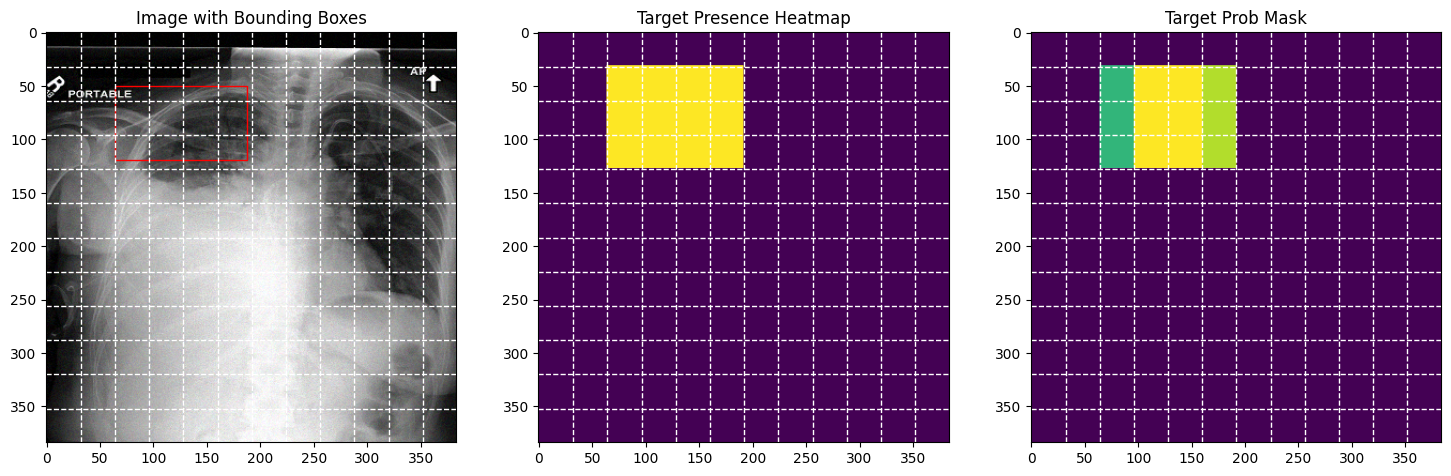

Original image:


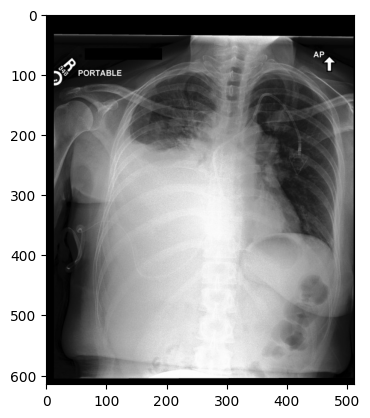

Phrase bboxes: [(0.3561320754716981, 0.2198952879581152, 0.294811320754717, 0.16361256544502617)]
Phrase idx: 605
Phrase: right pneumothorax


In [6]:
inspect_mscxr_dataset(out['mimiccxr_trainer'], 20, grounding_only_mode=True)

i: 8
image_id: 312447841912476392836878255221324752437_m4dphn
image_path: /mnt/workspace/BIMCV-Padchest-GR/PadChest_GR_JPG_600/312447841912476392836878255221324752437_m4dphn.jpg
image_tensor: torch.Size([3, 384, 384])
num_regions: 144, feat_W: 12, feat_H: 12
phrase_embedding: torch.Size([128])
target_bbox_coords: torch.Size([144, 4])
target_bbox_presence: torch.Size([144])
target_prob_mask: torch.Size([144])
Phrase bboxes: [(0.375951775, 0.4909449, 0.13261421, 0.22870573999999994), (0.67322335, 0.47914919, 0.13578679999999999, 0.23525891999999998), (0.734454315, 0.67934863, 0.17703044999999995, 0.12844220000000006)]
Phrase: bronchovascular markings
bbox_coords: [(0.7553630471229553, 0.4641978442668915, 0.24355179071426392, 0.32919391989707947), (0.8925181031227112, 0.6767475605010986, 0.21496383845806122, 0.21906553208827972), (0.44817060232162476, 0.5917511582374573, 0.2374081164598465, 0.3202572762966156), (0.8167935609817505, 0.542940616607666, 0.36641284823417664, 0.486679464578628

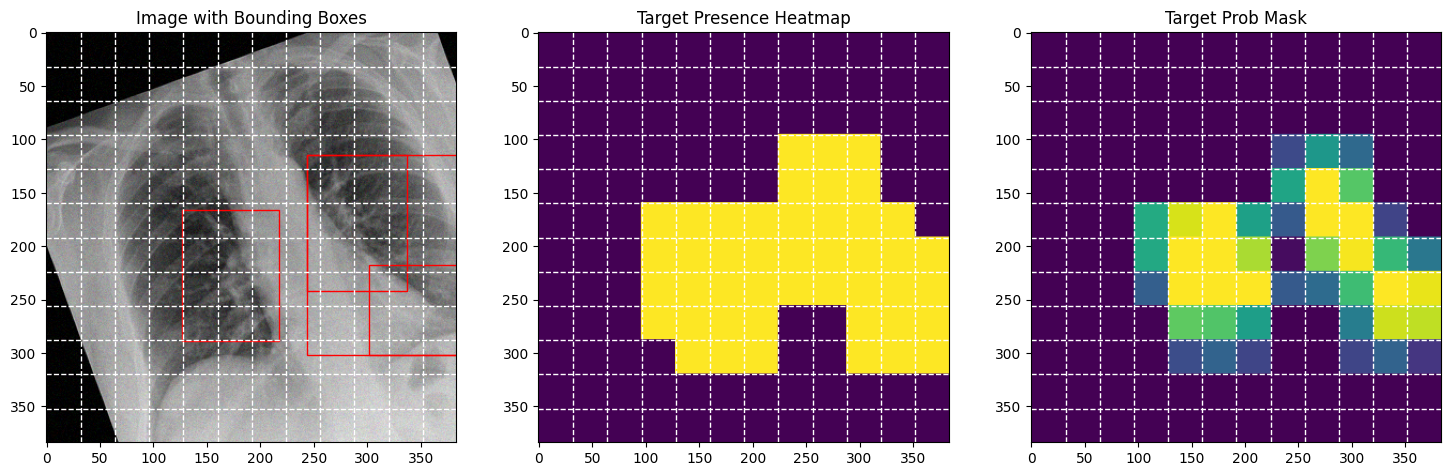

Original image:


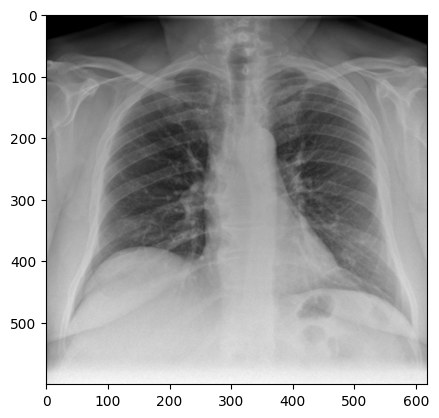

In [42]:
inspect_padchest_phrase_grounding_dataset(out['padchestgr_trainer'], 8, train=True)

In [ ]:
!python ../../train_phrase_grounding.py \
--epochs 200 \
--batches_per_epoch 300 \
--max_images_per_batch 11 \
--max_phrases_per_batch 1000 \
--max_phrases_per_image 40 \
--val_batch_size_factor 2.0 \
--raw_image_encoding "cxrmate-rrg24-uniformer-huggingface" \
--huggingface_model_name "aehrc/cxrmate-rrg24" \
--image_size 384 384 \
--image_local_feat_size 512 \
--num_regions 144 \
--regions_width 12 \
--regions_height 12 \
--img_aug_mode "random-color-and-spatial" \
--phrase_embedding_size 128 \
--phrase_grounding_mode "adaptive_film_based_pooling_mlp_with_bbox_regression" \
--phrase_mlp_hidden_dims 256 128 \
--visual_grounding_hidden_size 256 \
--bbox_format "cxcywh" \
--predict_relative_bbox_coords \
--num_train_workers 3 \
--num_val_workers 2 \
--gradient_accumulation_steps 4 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,8e-5,5,3e-6,8e-5,5,3e-6" \
--binary_multilabel_classif_loss_name "focal+bce+npbbce" \
--do_visual_grounding_with_bbox_regression \
--use_mscxr_for_train \
--use_mscxr_for_val \
--mscxr_training_data_mode "train" \
--mscxr_do_grounding_only \
--mscxr_phrase2embedding_filepath \
"/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/mimiccxr/mscxr_phrase2embedding(hash=36549,2076639799495206637).pkl" \
--use_padchest_gr_for_train \
--padchest_gr_phrase_embeddings_filepath \
"/mnt/data/pamessina_folder_backup_15_10_24/pamessina/medvqa-workspace/cache/padchest/padchest_gr_phrase2embedding(hash=197646,3110652540680293604).pkl" \
--padchest_gr_training_split "all" \
--padchest_gr_weight 2.0 \
--mscxr_weight 1.0 \
--save

2025-05-07 10:08:35,340 - root - INFO - Logging configured (Color: True).
2025-05-07 10:08:35,974 - medvqa.utils.common - INFO - 
script's arguments:
   epochs: 200
   batches_per_epoch: 300
   max_images_per_batch: 11
   max_phrases_per_batch: 1000
   max_phrases_per_image: 40
   val_batch_size_factor: 2.0
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: None
   freeze_image_encoder: False
   raw_image_encoding: cxrmate-rrg24-uniformer-huggingface
   huggingface_model_name: aehrc/cxrmate-rrg24
   num_regions: 144
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   image_encoder_dropout_p: 0
   yolov8_model_name_or_path: None
   yolov8_model_alias: None
   phrase_embedding_size: 128
   regions_width: 12
   regions_height: 12
   qkv_size: None
   phrase_grounding_mode: adaptive_film_based_pooling_mlp_with_bbox_regression
   phrase_classifier_hidden_size: None
   transf_d_model: None
   transf_nhead: 

2025-05-07 10:08:42,618 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Filtering dataset for split: all
2025-05-07 10:08:42,620 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Found 4555 unique studies for split 'all'
2025-05-07 10:08:42,620 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Loading reports JSON from: /mnt/workspace/BIMCV-Padchest-GR/grounded_reports_20240819.json
2025-05-07 10:08:42,911 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Loaded 4555 reports from JSON.
2025-05-07 10:08:42,911 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Processing data into image-phrase pairs...
Processing Studies: 100%|████████████████| 4555/4555 [00:00<00:00, 21859.33it/s]
2025-05-07 10:08:43,121 - medvqa.datasets.padchest.padchest_dataset_management - INFO - Created 12691 image-phrase grounding pairs.
2025-05-07 10:08:43,129 - medvqa.datasets.padchest.padchest_dataset_management - INFO -   Training DataLoad

2025-05-07 10:11:10,888 - medvqa.utils.handlers_utils - INFO - New checkpoint saved: checkpoint_1_msou+msss+msss+pcss+pcss=0.0587.pt
2025-05-07 10:11:10,889 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:04.740
2025-05-07 10:11:10,889 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:04.740
2025-05-07 10:11:10,889 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:02:25.718
2025-05-07 10:11:10,890 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 2/200 ====================
2025-05-07 10:11:10,890 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000004) ...
Training [2/200]: [300/300] 100%|███████████, loss=0.844 [02:27<00:00]
2025-05-07 10:13:39,031 - medvqa.utils.handlers_utils - INFO - loss 0.88131, mscxr_vgconf_loss 0.69265, mscxr_vgbbox_loss 0.16384, pchstgr_vgconf_loss 0.69162, pchstgr_vgbbox_loss 0.20210, 148.14 secs
2025-05-07 10:13:39,032 - medvqa.training.utils - INFO - (2

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 10:26:23,367 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.32844, 3.10 secs
2025-05-07 10:26:24,485 - medvqa.utils.handlers_utils - INFO - New checkpoint saved: checkpoint_7_msou+msss+msss+pcss+pcss=0.3540.pt
2025-05-07 10:26:24,486 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:04.223
2025-05-07 10:26:24,486 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:04.224
2025-05-07 10:26:24,486 - ignite.engine.engine.Engine - INFO - Epoch[7] Complete. Time taken: 00:02:31.599
2025-05-07 10:26:24,487 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 8/200 ====================
2025-05-07 10:26:24,487 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000006) ...
Training [8/200]: [300/300] 100%|███████████, loss=0.355 [02:26<00:00]
2025-05-07 10:28:51,483 - medvqa.utils.handlers_utils - INFO - loss 0.45456, mscxr_vgconf_loss 0.35580, mscxr_vg

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 10:41:09,621 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.36466, 3.19 secs
2025-05-07 10:41:10,372 - medvqa.utils.handlers_utils - INFO - New checkpoint saved: checkpoint_13_msou+msss+msss+pcss+pcss=0.3895.pt
2025-05-07 10:41:10,372 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.936
2025-05-07 10:41:10,372 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.936
2025-05-07 10:41:10,373 - ignite.engine.engine.Engine - INFO - Epoch[13] Complete. Time taken: 00:02:29.062
2025-05-07 10:41:10,373 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 14/200 ====================
2025-05-07 10:41:10,373 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000003) ...
Training [14/200]: [300/300] 100%|██████████, loss=0.301 [02:22<00:00]
2025-05-07 10:43:33,576 - medvqa.utils.handlers_utils - INFO - loss 0.38469, mscxr_vgconf_loss 0.27467, mscxr

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 10:55:48,206 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.39127, 3.14 secs
2025-05-07 10:55:48,207 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.136
2025-05-07 10:55:48,207 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.136
2025-05-07 10:55:48,208 - ignite.engine.engine.Engine - INFO - Epoch[19] Complete. Time taken: 00:02:25.774
2025-05-07 10:55:48,208 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 20/200 ====================
2025-05-07 10:55:48,208 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000080) ...
Training [20/200]: [300/300] 100%|██████████, loss=0.219 [02:21<00:00]
2025-05-07 10:58:10,656 - medvqa.utils.handlers_utils - INFO - loss 0.33848, mscxr_vgconf_loss 0.23175, mscxr_vgbbox_loss 0.01581, pchstgr_vgconf_loss 0.35293, pchstgr_vgbbox_loss 0.03101, 142.45 secs
2025-05-07 10:58:10,657 - medvqa.training.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training [37/200]: [300/300] 100%|██████████, loss=0.185 [02:24<00:00]
2025-05-07 11:39:53,696 - medvqa.utils.handlers_utils - INFO - loss 0.26488, mscxr_vgconf_loss 0.15071, mscxr_vgbbox_loss 0.01227, pchstgr_vgconf_loss 0.28715, pchstgr_vgbbox_loss 0.02868, 144.73 secs
2025-05-07 11:39:53,697 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 11:39:53,698 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 11:39:56,865 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.42516, 3.17 secs
2025-05-07 11:39:56,866 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.168
2025-05-07 11:39:56,866 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.168
2025-05-07 11:39:56,866 - ignite.engine.engine.Engine - INFO - Epoch[37] Complete. Time taken: 00:02:27.902
2025-05-07 11:39:56,867 - medvqa.utils.handlers_utils - INFO - =========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 11:54:49,602 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.42627, 3.22 secs
2025-05-07 11:54:49,602 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.216
2025-05-07 11:54:49,603 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.216
2025-05-07 11:54:49,603 - ignite.engine.engine.Engine - INFO - Epoch[43] Complete. Time taken: 00:02:27.821
2025-05-07 11:54:49,603 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 44/200 ====================
2025-05-07 11:54:49,604 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000003) ...
Training [44/200]: [300/300] 100%|██████████, loss=0.207 [02:23<00:00]
2025-05-07 11:57:13,942 - medvqa.utils.handlers_utils - INFO - loss 0.25271, mscxr_vgconf_loss 0.13912, mscxr_vgbbox_loss 0.01151, pchstgr_vgconf_loss 0.27451, pchstgr_vgbbox_loss 0.02924, 144.34 secs
2025-05-07 11:57:13,943 - medvqa.training.

Training [50/200]: [300/300] 100%|██████████, loss=0.149 [02:24<00:00]
2025-05-07 12:12:03,890 - medvqa.utils.handlers_utils - INFO - loss 0.24488, mscxr_vgconf_loss 0.13458, mscxr_vgbbox_loss 0.01165, pchstgr_vgconf_loss 0.26808, pchstgr_vgbbox_loss 0.02613, 145.19 secs
2025-05-07 12:12:03,890 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 12:12:03,891 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 12:12:07,068 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.41462, 3.18 secs
2025-05-07 12:12:07,069 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.178
2025-05-07 12:12:07,069 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.178
2025-05-07 12:12:07,069 - ignite.engine.engine.Engine - INFO - Epoch[50] Complete. Time taken: 00:02:28.369
2025-05-07 12:12:07,070 - medvqa.utils.handlers_utils - INFO - =========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 12:26:45,970 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.41837, 3.20 secs
2025-05-07 12:26:45,971 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.199
2025-05-07 12:26:45,971 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.199
2025-05-07 12:26:45,972 - ignite.engine.engine.Engine - INFO - Epoch[56] Complete. Time taken: 00:02:25.956
2025-05-07 12:26:45,972 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 57/200 ====================
2025-05-07 12:26:45,972 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000015) ...
Training [57/200]: [300/300] 100%|█████████, loss=0.0264 [02:22<00:00]
2025-05-07 12:29:08,704 - medvqa.utils.handlers_utils - INFO - loss 0.22858, mscxr_vgconf_loss 0.12539, mscxr_vgbbox_loss 0.01024, pchstgr_vgconf_loss 0.25009, pchstgr_vgbbox_loss 0.02497, 142.73 secs
2025-05-07 12:29:08,704 - medvqa.training.

Training [63/200]: [300/300] 100%|█████████, loss=0.0973 [02:23<00:00]
2025-05-07 12:43:48,490 - medvqa.utils.handlers_utils - INFO - loss 0.21870, mscxr_vgconf_loss 0.11042, mscxr_vgbbox_loss 0.00971, pchstgr_vgconf_loss 0.24235, pchstgr_vgbbox_loss 0.02562, 143.59 secs
2025-05-07 12:43:48,491 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 12:43:48,492 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 12:43:51,651 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.43446, 3.16 secs
2025-05-07 12:43:51,652 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.160
2025-05-07 12:43:51,652 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.160
2025-05-07 12:43:51,653 - ignite.engine.engine.Engine - INFO - Epoch[63] Complete. Time taken: 00:02:26.752
2025-05-07 12:43:51,653 - medvqa.utils.handlers_utils - INFO - =========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 12:58:27,642 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.42254, 3.09 secs
2025-05-07 12:58:27,642 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.090
2025-05-07 12:58:27,643 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.090
2025-05-07 12:58:27,643 - ignite.engine.engine.Engine - INFO - Epoch[69] Complete. Time taken: 00:02:25.399
2025-05-07 12:58:27,643 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 70/200 ====================
2025-05-07 12:58:27,644 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000080) ...
Training [70/200]: [300/300] 100%|██████████, loss=0.102 [02:24<00:00]
2025-05-07 13:00:52,328 - medvqa.utils.handlers_utils - INFO - loss 0.21416, mscxr_vgconf_loss 0.10928, mscxr_vgbbox_loss 0.00953, pchstgr_vgconf_loss 0.23704, pchstgr_vgbbox_loss 0.02479, 144.68 secs
2025-05-07 13:00:52,328 - medvqa.training.

Training [76/200]: [300/300] 100%|██████████, loss=0.115 [02:28<00:00]
2025-05-07 13:15:51,454 - medvqa.utils.handlers_utils - INFO - loss 0.20859, mscxr_vgconf_loss 0.10214, mscxr_vgbbox_loss 0.00956, pchstgr_vgconf_loss 0.23308, pchstgr_vgbbox_loss 0.02395, 148.82 secs
2025-05-07 13:15:51,455 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 13:15:51,455 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 13:15:54,925 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.42671, 3.47 secs
2025-05-07 13:15:54,926 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.471
2025-05-07 13:15:54,926 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.471
2025-05-07 13:15:54,927 - ignite.engine.engine.Engine - INFO - Epoch[76] Complete. Time taken: 00:02:32.295
2025-05-07 13:15:54,927 - medvqa.utils.handlers_utils - INFO - =========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 13:30:54,901 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.43879, 3.34 secs
2025-05-07 13:30:54,902 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.339
2025-05-07 13:30:54,902 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.339
2025-05-07 13:30:54,903 - ignite.engine.engine.Engine - INFO - Epoch[82] Complete. Time taken: 00:02:32.425
2025-05-07 13:30:54,903 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 83/200 ====================
2025-05-07 13:30:54,903 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000007) ...
Training [83/200]: [300/300] 100%|██████████, loss=0.086 [02:28<00:00]
2025-05-07 13:33:23,530 - medvqa.utils.handlers_utils - INFO - loss 0.19795, mscxr_vgconf_loss 0.09013, mscxr_vgbbox_loss 0.00846, pchstgr_vgconf_loss 0.22291, pchstgr_vgbbox_loss 0.02472, 148.63 secs
2025-05-07 13:33:23,531 - medvqa.training.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training [103/200]: [300/300] 100%|█████████, loss=0.103 [02:33<00:00]
2025-05-07 14:24:55,286 - medvqa.utils.handlers_utils - INFO - loss 0.18152, mscxr_vgconf_loss 0.07717, mscxr_vgbbox_loss 0.00762, pchstgr_vgconf_loss 0.20859, pchstgr_vgbbox_loss 0.02130, 154.10 secs
2025-05-07 14:24:55,286 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 14:24:55,287 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 14:24:58,870 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.44862, 3.58 secs
2025-05-07 14:24:58,871 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.583
2025-05-07 14:24:58,871 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.584
2025-05-07 14:24:58,872 - ignite.engine.engine.Engine - INFO - Epoch[103] Complete. Time taken: 00:02:37.687
2025-05-07 14:24:58,872 - medvqa.utils.handlers_utils - INFO - ========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 14:40:14,786 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.45365, 3.50 secs
2025-05-07 14:40:15,659 - medvqa.utils.handlers_utils - INFO - New checkpoint saved: checkpoint_109_msou+msss+msss+pcss+pcss=0.4777.pt
2025-05-07 14:40:15,659 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:04.372
2025-05-07 14:40:15,659 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:04.372
2025-05-07 14:40:15,660 - ignite.engine.engine.Engine - INFO - Epoch[109] Complete. Time taken: 00:02:33.263
2025-05-07 14:40:15,660 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 110/200 ====================
2025-05-07 14:40:15,660 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000080) ...
Training [110/200]: [300/300] 100%|████████, loss=0.0711 [02:28<00:00]
2025-05-07 14:42:44,352 - medvqa.utils.handlers_utils - INFO - loss 0.18296, mscxr_vgconf_loss 0.07889, ms

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training [120/200]: [300/300] 100%|█████████, loss=0.238 [02:30<00:00]
2025-05-07 15:08:29,587 - medvqa.utils.handlers_utils - INFO - loss 0.17645, mscxr_vgconf_loss 0.07355, mscxr_vgbbox_loss 0.00741, pchstgr_vgconf_loss 0.20335, pchstgr_vgbbox_loss 0.02084, 151.21 secs
2025-05-07 15:08:29,588 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 15:08:29,589 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 15:08:32,847 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.44686, 3.26 secs
2025-05-07 15:08:32,848 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.259
2025-05-07 15:08:32,848 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.259
2025-05-07 15:08:32,848 - ignite.engine.engine.Engine - INFO - Epoch[120] Complete. Time taken: 00:02:34.475
2025-05-07 15:08:32,849 - medvqa.utils.handlers_utils - INFO - ========

Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 15:23:52,401 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.44245, 3.40 secs
2025-05-07 15:23:52,402 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.398
2025-05-07 15:23:52,402 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.399
2025-05-07 15:23:52,402 - ignite.engine.engine.Engine - INFO - Epoch[126] Complete. Time taken: 00:02:34.065
2025-05-07 15:23:52,403 - medvqa.utils.handlers_utils - INFO - ==================== Epoch 127/200 ====================
2025-05-07 15:23:52,403 - medvqa.training.utils - INFO - (1) Training stage (lr = 0.000015) ...
Training [127/200]: [300/300] 100%|████████, loss=0.0881 [02:32<00:00]
2025-05-07 15:26:25,491 - medvqa.utils.handlers_utils - INFO - loss 0.16421, mscxr_vgconf_loss 0.06567, mscxr_vgbbox_loss 0.00671, pchstgr_vgconf_loss 0.19026, pchstgr_vgbbox_loss 0.01987, 153.09 secs
2025-05-07 15:26:25,492 - medvqa.trainin

Training [133/200]: [300/300] 100%|████████, loss=0.0652 [02:25<00:00]
2025-05-07 15:41:33,025 - medvqa.utils.handlers_utils - INFO - loss 0.16399, mscxr_vgconf_loss 0.06729, mscxr_vgbbox_loss 0.00664, pchstgr_vgconf_loss 0.18824, pchstgr_vgbbox_loss 0.02078, 146.43 secs
2025-05-07 15:41:33,025 - medvqa.training.utils - INFO - (2) Validation stage ...
2025-05-07 15:41:33,026 - ignite.engine.engine.Engine - INFO - Engine run starting with max_epochs=1.
Validation: [8/8] 100%|█████████████ [00:02<00:00]
2025-05-07 15:41:36,597 - medvqa.utils.handlers_utils - INFO - mscxr_bbox_iou 0.44667, 3.57 secs
2025-05-07 15:41:36,598 - ignite.engine.engine.Engine - INFO - Epoch[1] Complete. Time taken: 00:00:03.571
2025-05-07 15:41:36,598 - ignite.engine.engine.Engine - INFO - Engine run complete. Time taken: 00:00:03.571
2025-05-07 15:41:36,598 - ignite.engine.engine.Engine - INFO - Epoch[133] Complete. Time taken: 00:02:30.002
2025-05-07 15:41:36,599 - medvqa.utils.handlers_utils - INFO - ========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training [151/200]: [296/300]  99%|████████▉, loss=0.216 [02:24<00:01]